Import Dependencies
Standard Python libraries used for -------------

In [44]:
# Import dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

Data Ingestion
Loading the data from credit_card_transactions.csv and checking the initial few rows.

In [45]:
# Read the CSV file into a dataframe
data = pd.read_csv('credit_card_transactions.csv')

# Display the first few records
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


Data Exploration
Explore the dataframe to assess for necessary pre-processing steps like null value handling and feature engineering

In [46]:
# Explore data columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [47]:
# function to get number of unique values for each column ..
# to determine what kind of encoding and imputation needs to be done!

def display_unique_values(data):
    """
    Display unique values and the number of unique values for each column in the dataframe.

    Parameters:
    data (pd.DataFrame): The dataframe to analyze.

    Returns:
    None
    """
    for column in data.columns:
        unique_values = data[column].unique()
        print(f"Column: {column}")
        print(f"Data Type: {data[column].dtype}")
        print(f"Number of Unique Values: {len(unique_values)}")
        print(f"Unique Values: {unique_values[:10]}...")  # Show the first 10 unique values for brevity
        print("-" * 50)

# Display details of each column:
display_unique_values(data)

Column: Unnamed: 0
Data Type: int64
Number of Unique Values: 1296675
Unique Values: [0 1 2 3 4 5 6 7 8 9]...
--------------------------------------------------
Column: trans_date_trans_time
Data Type: object
Number of Unique Values: 1274791
Unique Values: ['2019-01-01 00:00:18' '2019-01-01 00:00:44' '2019-01-01 00:00:51'
 '2019-01-01 00:01:16' '2019-01-01 00:03:06' '2019-01-01 00:04:08'
 '2019-01-01 00:04:42' '2019-01-01 00:05:08' '2019-01-01 00:05:18'
 '2019-01-01 00:06:01']...
--------------------------------------------------
Column: cc_num
Data Type: int64
Number of Unique Values: 983
Unique Values: [2703186189652095     630423337322   38859492057661 3534093764340240
  375534208663984 4767265376804500   30074693890476 6011360759745864
 4922710831011201 2720830304681674]...
--------------------------------------------------
Column: merchant
Data Type: object
Number of Unique Values: 693
Unique Values: ['fraud_Rippin, Kub and Mann' 'fraud_Heller, Gutmann and Zieme'
 'fraud_Lind-Buckr

Data Cleaning
Cleaning and preprocessing the dataset by removing unnecessary columns and converting date columns.

In [48]:
# Make a copy for transformation
ak_df = data.copy()

# Convert date columns to datetime format
ak_df['trans_date_trans_time'] = pd.to_datetime(ak_df['trans_date_trans_time'])
ak_df['dob'] = pd.to_datetime(ak_df['dob'])

DataFrame Sorting
we will be doing the datasplitting based on timeseries, that is why it is important to sort the dataframe

In [49]:
# Sort the dataframe by 'trans_date_trans_time' in ascending order
data = data.sort_values(by='trans_date_trans_time', ascending=True)

# Reset the index after sorting
data.reset_index(drop=True, inplace=True)

# Verify the sorting
print(data[['trans_date_trans_time']].head())  # Display the first few rows to confirm sorting

  trans_date_trans_time
0   2019-01-01 00:00:18
1   2019-01-01 00:00:44
2   2019-01-01 00:00:51
3   2019-01-01 00:01:16
4   2019-01-01 00:03:06


Feature Engineering - Age Patterns

In [50]:
# AGE - Calculate age based on DOB and transaction year
ak_df['ft_age'] = ak_df['trans_date_trans_time'].dt.year - ak_df['dob'].dt.year

# AGE SEGMENT - Define age segments
def age_segment(age):
    if age < 18:
        return 'Under 18'
    elif 19 <= age <= 28:
        return '19-28'
    elif 29 <= age <= 38:
        return '29-38'
    elif 39 <= age <= 48:
        return '39-48'
    elif 49 <= age <= 58:
        return '49-58'
    elif 59 <= age <= 68:
        return '59-68'
    elif 69 <= age <= 78:
        return '69-78'
    else:
        return '79+'

# Apply age segmentation
ak_df['ft_age_group'] = ak_df['ft_age'].apply(age_segment)

ak_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode,ft_age,ft_age_group
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0,31,29-38
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN,41,39-48
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0,57,49-58
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN,52,49-58
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0,33,29-38


Feature Engineering - Temporal Patterns

In [51]:
# TRANSACTION HOUR
ak_df['ft_trans_hour'] = ak_df['trans_date_trans_time'].dt.hour

# TIME OF DAY - Categorize time of day based on transaction hour
ak_df['ft_time_of_day'] = ak_df['trans_date_trans_time'].dt.hour.apply(
    lambda hour: 'Morning' if 6 <= hour < 12 else
    ('Afternoon' if 12 <= hour < 18 else
    ('Evening' if 18 <= hour < 24 else 'Night'))
)

# TRANSACTION DAY
ak_df['ft_trans_day'] = ak_df['trans_date_trans_time'].dt.day

# TRANSACTION DAY OF YEAR
ak_df['ft_trans_day_of_year'] = ak_df['trans_date_trans_time'].dt.dayofyear

# TRANSACTION MONTH
ak_df['ft_trans_month'] = ak_df['trans_date_trans_time'].dt.month

# TRANSACTION YEAR - Add a new column 'ft_trans_year' to represent the year of the transaction
ak_df['ft_trans_year'] = ak_df['trans_date_trans_time'].dt.year

# DAY OF WEEK - Add a new column 'day_of_week' to represent the day of the week (0=Monday, 6=Sunday)
ak_df['ft_day_of_week'] = ak_df['trans_date_trans_time'].dt.day_name()


ak_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,merch_zipcode,ft_age,ft_age_group,ft_trans_hour,ft_time_of_day,ft_trans_day,ft_trans_day_of_year,ft_trans_month,ft_trans_year,ft_day_of_week
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,28705.0,31,29-38,0,Night,1,1,1,2019,Tuesday
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,NaN,41,39-48,0,Night,1,1,1,2019,Tuesday
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,83236.0,57,49-58,0,Night,1,1,1,2019,Tuesday
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,NaN,52,49-58,0,Night,1,1,1,2019,Tuesday
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,22844.0,33,29-38,0,Night,1,1,1,2019,Tuesday


Feature Engineering - Distance Patterns
Distance between user and merchant for the transaction
Large deviations in the transaction’s location compared to the user’s regular pattern could indicate fraud

In [52]:
# DISTANCE BETWEEN USER AND MERCHANT

import numpy as np

# Define the Haversine Formula function that calculates the distance given two latitude/longitude points
def haversine(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    radius = 6371  # Radius of Earth in kilometers
    return radius * c

# Create a new column for distance
ak_df['ft_distance_user_merchant'] = haversine(
    ak_df['lat'], ak_df['long'],
    ak_df['merch_lat'], ak_df['merch_long']
)

# Calculate the average distance of previous transactions for a user and compare the current transaction distance
user_avg_distance = ak_df.groupby('cc_num')['ft_distance_user_merchant'].transform('mean')
ak_df['ft_merchant_distance_from_user_mean'] = ak_df['ft_distance_user_merchant'] - user_avg_distance


ak_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,ft_age_group,ft_trans_hour,ft_time_of_day,ft_trans_day,ft_trans_day_of_year,ft_trans_month,ft_trans_year,ft_day_of_week,ft_distance_user_merchant,ft_merchant_distance_from_user_mean
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,29-38,0,Night,1,1,1,2019,Tuesday,78.597568,0.637376
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,39-48,0,Night,1,1,1,2019,Tuesday,30.212176,-41.580370
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,49-58,0,Night,1,1,1,2019,Tuesday,108.206083,34.130756
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,49-58,0,Night,1,1,1,2019,Tuesday,95.673231,23.971060
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,29-38,0,Night,1,1,1,2019,Tuesday,77.556744,2.322402


Feature Engineering - Merchant Popularity
Uncommon merchants with a low transaction count might be associated with fraud

In [53]:
# Count the number of transactions for each merchant in the dataset
merchant_transaction_counts = ak_df['merchant'].value_counts()
ak_df['ft_merchant_popularity'] = ak_df['merchant'].map(merchant_transaction_counts)

ak_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,ft_trans_hour,ft_time_of_day,ft_trans_day,ft_trans_day_of_year,ft_trans_month,ft_trans_year,ft_day_of_week,ft_distance_user_merchant,ft_merchant_distance_from_user_mean,ft_merchant_popularity
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,0,Night,1,1,1,2019,Tuesday,78.597568,0.637376,1267
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,0,Night,1,1,1,2019,Tuesday,30.212176,-41.580370,2503
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,0,Night,1,1,1,2019,Tuesday,108.206083,34.130756,1895
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,0,Night,1,1,1,2019,Tuesday,95.673231,23.971060,2613
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,0,Night,1,1,1,2019,Tuesday,77.556744,2.322402,1592


Feature Engineering - User Spending Behavior: Mean Transaction Amount (mean_amt_per_user)
Transactions significantly above or below the user’s average spending pattern may indicate fraud

In [54]:
# Calculate the mean transaction amount for each user (cc_num)
user_mean_amt = ak_df.groupby('cc_num')['amt'].transform('mean')
ak_df['ft_mean_amt_per_user'] = user_mean_amt

ak_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,ft_time_of_day,ft_trans_day,ft_trans_day_of_year,ft_trans_month,ft_trans_year,ft_day_of_week,ft_distance_user_merchant,ft_merchant_distance_from_user_mean,ft_merchant_popularity,ft_mean_amt_per_user
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,Night,1,1,1,2019,Tuesday,78.597568,0.637376,1267,87.393215
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,Night,1,1,1,2019,Tuesday,30.212176,-41.580370,2503,53.949320
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,Night,1,1,1,2019,Tuesday,108.206083,34.130756,1895,65.870040
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,Night,1,1,1,2019,Tuesday,95.673231,23.971060,2613,72.776673
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,Night,1,1,1,2019,Tuesday,77.556744,2.322402,1592,95.178091


Feature Engineering - Transaction Amount Deviation (amt_deviation)
Sudden changes in spending behavior (either very high or very low) could be a red flag

In [55]:
# Calculate the deviation of the transaction amount from the user’s mean transaction amount
ak_df['ft_amt_deviation'] = ak_df['amt'] - ak_df['ft_mean_amt_per_user']

ak_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,ft_trans_day,ft_trans_day_of_year,ft_trans_month,ft_trans_year,ft_day_of_week,ft_distance_user_merchant,ft_merchant_distance_from_user_mean,ft_merchant_popularity,ft_mean_amt_per_user,ft_amt_deviation
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,1,1,1,2019,Tuesday,78.597568,0.637376,1267,87.393215,-82.423215
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,1,1,1,2019,Tuesday,30.212176,-41.580370,2503,53.949320,53.280680
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,1,1,1,2019,Tuesday,108.206083,34.130756,1895,65.870040,154.239960
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1,1,1,2019,Tuesday,95.673231,23.971060,2613,72.776673,-27.776673
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,1,1,1,2019,Tuesday,77.556744,2.322402,1592,95.178091,-53.218091


Feature Engineering - Transaction Frequency (transaction_count_per_user)
Users with abnormally high transaction counts might exhibit fraudulent behavior

In [56]:
# Count the number of transactions for each user (cc_num)
user_transaction_count = ak_df['cc_num'].value_counts()
ak_df['ft_transaction_count_per_user'] = ak_df['cc_num'].map(user_transaction_count)

ak_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,ft_trans_day_of_year,ft_trans_month,ft_trans_year,ft_day_of_week,ft_distance_user_merchant,ft_merchant_distance_from_user_mean,ft_merchant_popularity,ft_mean_amt_per_user,ft_amt_deviation,ft_transaction_count_per_user
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,1,1,2019,Tuesday,78.597568,0.637376,1267,87.393215,-82.423215,2028
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,1,1,2019,Tuesday,30.212176,-41.580370,2503,53.949320,53.280680,3030
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,1,1,2019,Tuesday,108.206083,34.130756,1895,65.870040,154.239960,503
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1,1,2019,Tuesday,95.673231,23.971060,2613,72.776673,-27.776673,493
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,1,1,2019,Tuesday,77.556744,2.322402,1592,95.178091,-53.218091,2017


Feature Engineering - Fraud Rate by State (state_fraud_rate)
States with unusually high fraud rates could signal suspicious activity

In [57]:
# Calculate the fraud rate for each state by dividing the number of fraudulent transactions by the total number of transactions
fraud_rate_by_state = ak_df.groupby('state')['is_fraud'].mean()
ak_df['ft_state_fraud_rate'] = ak_df['state'].map(fraud_rate_by_state)

ak_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,ft_trans_month,ft_trans_year,ft_day_of_week,ft_distance_user_merchant,ft_merchant_distance_from_user_mean,ft_merchant_popularity,ft_mean_amt_per_user,ft_amt_deviation,ft_transaction_count_per_user,ft_state_fraud_rate
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,1,2019,Tuesday,78.597568,0.637376,1267,87.393215,-82.423215,2028,0.004923
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,1,2019,Tuesday,30.212176,-41.580370,2503,53.949320,53.280680,3030,0.005073
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,1,2019,Tuesday,108.206083,34.130756,1895,65.870040,154.239960,503,0.001984
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1,2019,Tuesday,95.673231,23.971060,2613,72.776673,-27.776673,493,0.002722
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,1,2019,Tuesday,77.556744,2.322402,1592,95.178091,-53.218091,2017,0.006769


Feature Engineering - Recurring Transaction Flag (is_recurring)
Recurring transactions are less likely to be fraudulent

In [58]:
# Flag transactions as recurring if the same merchant and cc_num combination appears multiple times within a short period
ak_df['ft_transaction_is_recurring'] = ak_df.duplicated(subset=['cc_num', 'merchant'], keep=False).astype(int)

ak_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,ft_trans_year,ft_day_of_week,ft_distance_user_merchant,ft_merchant_distance_from_user_mean,ft_merchant_popularity,ft_mean_amt_per_user,ft_amt_deviation,ft_transaction_count_per_user,ft_state_fraud_rate,ft_transaction_is_recurring
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,2019,Tuesday,78.597568,0.637376,1267,87.393215,-82.423215,2028,0.004923,1
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,2019,Tuesday,30.212176,-41.580370,2503,53.949320,53.280680,3030,0.005073,1
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,2019,Tuesday,108.206083,34.130756,1895,65.870040,154.239960,503,0.001984,1
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,2019,Tuesday,95.673231,23.971060,2613,72.776673,-27.776673,493,0.002722,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,2019,Tuesday,77.556744,2.322402,1592,95.178091,-53.218091,2017,0.006769,1


In [59]:
# lets review the current columns of the updated dataframe
ak_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 41 columns):
 #   Column                               Non-Null Count    Dtype         
---  ------                               --------------    -----         
 0   Unnamed: 0                           1296675 non-null  int64         
 1   trans_date_trans_time                1296675 non-null  datetime64[ns]
 2   cc_num                               1296675 non-null  int64         
 3   merchant                             1296675 non-null  object        
 4   category                             1296675 non-null  object        
 5   amt                                  1296675 non-null  float64       
 6   first                                1296675 non-null  object        
 7   last                                 1296675 non-null  object        
 8   gender                               1296675 non-null  object        
 9   street                               1296675 non-null  ob

In [60]:
# Drop unnecessary columns
columns_to_drop = [
    'Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'first', 'last', 'street', 'trans_num', 'lat', 
    'long', 'merch_zipcode', 'ft_age', 'merch_lat', 'merch_long', 'trans_num', 'unix_time', 'zip', 'dob'
]
ak_df_cleaned = ak_df.drop(columns=columns_to_drop)

ak_df_cleaned.head()

# Check for null values
# print(ak_df_cleaned.isnull().sum())

,merchant,category,amt,gender,city,state,city_pop,job,is_fraud,ft_age_group,...,ft_trans_year,ft_day_of_week,ft_distance_user_merchant,ft_merchant_distance_from_user_mean,ft_merchant_popularity,ft_mean_amt_per_user,ft_amt_deviation,ft_transaction_count_per_user,ft_state_fraud_rate,ft_transaction_is_recurring
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,3495,"Psychologist, counselling",0,29-38,...,2019,Tuesday,78.597568,0.637376,1267,87.393215,-82.423215,2028,0.004923,1
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,149,Special educational needs teacher,0,39-48,...,2019,Tuesday,30.212176,-41.580370,2503,53.949320,53.280680,3030,0.005073,1
2,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,4154,Nature conservation officer,0,49-58,...,2019,Tuesday,108.206083,34.130756,1895,65.870040,154.239960,503,0.001984,1
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,1939,Patent attorney,0,49-58,...,2019,Tuesday,95.673231,23.971060,2613,72.776673,-27.776673,493,0.002722,0
4,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,99,Dance movement psychotherapist,0,29-38,...,2019,Tuesday,77.556744,2.322402,1592,95.178091,-53.218091,2017,0.006769,1


In [61]:
# Explore data columns
ak_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 25 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   merchant                             1296675 non-null  object 
 1   category                             1296675 non-null  object 
 2   amt                                  1296675 non-null  float64
 3   gender                               1296675 non-null  object 
 4   city                                 1296675 non-null  object 
 5   state                                1296675 non-null  object 
 6   city_pop                             1296675 non-null  int64  
 7   job                                  1296675 non-null  object 
 8   is_fraud                             1296675 non-null  int64  
 9   ft_age_group                         1296675 non-null  object 
 10  ft_trans_hour                        1296675 non-null  int32  
 11

Calculate Average Fraud Detection
Lets calculate average fraud detection as a global constant to be used in the evaluation metric

For simplicity, we are calculating false_positive_cost to be 5% of average fraud loss

FUTURE IMPROVEMENT: too many false positives can cause customer to churn * calculate avg customer LTV * calculate churn rate * assume (Can take business help) that 2% of customer churn due to false positives * calculate cost of false positives based on above calculations

In [62]:
# Filter fraudulent transactions
fraud_transactions = ak_df_cleaned[ak_df_cleaned['is_fraud'] == 1]

# Calculate average fraud loss
avg_fraud_loss = fraud_transactions['amt'].mean()

print(f"Average Fraud Loss: ${avg_fraud_loss:.2f}")

# Calculate false positive cost as 5% of avg_fraud_loss
false_positive_cost = avg_fraud_loss * 0.05

print(f"False Positive Cost (5% of Avg Fraud Loss): ${false_positive_cost:.2f}")

Average Fraud Loss: $531.32
False Positive Cost (5% of Avg Fraud Loss): $26.57


SPlit the Data for training
Make sure that the dataframe is already sorted, otherwise add a step to sort it now
Instead of using standard train_test_split, we are manually splitting the data into 2 steps:

In [63]:
### ARCHIVE ###
### Standard method of splitting ###
# # Setup X and y variables
# X = ak_df_cleaned.drop(columns='is_fraud')
# y = ak_df_cleaned['is_fraud'].values.reshape(-1,1)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# X_train.describe()

Step1: Split in 2 sets using iloc on the sorted dataset. This will assign latest data to testing set (which is what we want!)

X_train_val Set: 85%
X_test Set: 15%

In [64]:
# Step 1: Define the split points
train_val_size = 0.85  # 85% for train + validation
test_size = 0.15       # 15% for testing

# Compute the number of rows for train-validation and test sets
train_val_end = int(len(ak_df_cleaned) * train_val_size)

# Step 2: Split the data into train-validation and test sets
train_val_data = ak_df_cleaned.iloc[:train_val_end]
test_data = ak_df_cleaned.iloc[train_val_end:]

# Step 3: Separate features and target for train-validation and test sets
X_train_val = train_val_data.drop(columns=['is_fraud'])
y_train_val = train_val_data['is_fraud']

X_test = test_data.drop(columns=['is_fraud'])
y_test = test_data['is_fraud']

# Confirm the sizes of the train-validation and test splits
print(f"Train-Validation set size: {len(X_train_val)}")
print(f"Testing set size: {len(X_test)}")

Train-Validation set size: 1102173
Testing set size: 194502


In [65]:
# Step 4: Perform a stratified split on train-validation data
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, 
    y_train_val, 
    test_size=0.2,  # 20% of train_val_data for validation
    random_state=42, 
    stratify=y_train_val  # Ensures equal class distribution
)

# Step 5: Confirm the sizes and stratification of training and validation splits
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print('***************')
print(f"Training target distribution:\n{y_train.value_counts(normalize=True)}")
print('***************')
print(f"Validation target distribution:\n{y_val.value_counts(normalize=True)}")
print('***************')
# Final output
print(f"Final Testing set size: {len(X_test)}")

Training set size: 881738
Validation set size: 220435
***************
Training target distribution:
is_fraud
0    0.994218
1    0.005782
Name: proportion, dtype: float64
***************
Validation target distribution:
is_fraud
0    0.994216
1    0.005784
Name: proportion, dtype: float64
***************
Final Testing set size: 194502


In [66]:
#### ARCHIVE ####
#### THIS code is if we want to simply split data based on time and % ####


# Step 1: Make sure that the dataframe is sorted
# we made sure that the data is sorted as the first step of data cleaning

# # Step 2: Define the split points
# train_size = 0.7  # 70% for training
# validation_size = 0.15  # 15% for validation
# test_size = 0.15  # 15% for testing

# # Compute the number of rows for each set
# train_end = int(len(ak_df_cleaned) * train_size)
# validation_end = train_end + int(len(ak_df_cleaned) * validation_size)

# # Step 3: Split the data
# train_data = ak_df_cleaned.iloc[:train_end]
# validation_data = ak_df_cleaned.iloc[train_end:validation_end]
# test_data = ak_df_cleaned.iloc[validation_end:]

# # Step 4: Separate features and target for each set
# X_train = train_data.drop(columns=['is_fraud'])
# y_train = train_data['is_fraud']

# X_validation = validation_data.drop(columns=['is_fraud'])
# y_validation = validation_data['is_fraud']

# X_test = test_data.drop(columns=['is_fraud'])
# y_test = test_data['is_fraud']

# # Confirm the sizes of the splits
# print(f"Training set size: {len(X_train)}")
# print(f"Validation set size: {len(X_validation)}")
# print(f"Testing set size: {len(X_test)}")



Encoding
Used Target Encoding to genrealise the encoding across multiple columns

In [67]:

!pip install category-encoders

In [68]:
import category_encoders as ce

# Define categorical columns to encode
categorical_columns = [
    'merchant', 'category', 'gender', 'city', 'state', 
    'job', 'ft_time_of_day', 'ft_age_group', 'ft_day_of_week'
]

# Step 1: Initialize the target encoder
encoder = ce.TargetEncoder(cols=categorical_columns)

# Step 2: Fit the encoder on the training set using y_train
X_train_encoded = encoder.fit_transform(X_train, y_train)

# Step 3: Transform the validation and test sets using the fitted encoder
X_val_encoded = encoder.transform(X_val)
X_test_encoded = encoder.transform(X_test)

# Step 4: Display the first few rows of each encoded dataset to verify
print("Encoded X_train:")
print(X_train_encoded.head(2))

print("Encoded X_val:")
print(X_val_encoded.head(2))

print("Encoded X_test:")
print(X_test_encoded.head(2))

Encoded X_train:
        merchant  category    amt    gender  city     state  city_pop  \
185602  0.002238  0.002322  26.11  0.005183   0.0  0.004416       149   
307895  0.003425  0.004680  91.11  0.005183   0.0  0.006679      1131   

             job  ft_age_group  ft_trans_hour  ...  ft_trans_year  \
185602  0.002593      0.004037             20  ...           2019   
307895  0.001572      0.006414             10  ...           2019   

        ft_day_of_week  ft_distance_user_merchant  \
185602        0.006147                  74.401415   
307895        0.006162                   5.407588   

        ft_merchant_distance_from_user_mean  ft_merchant_popularity  \
185602                             2.608869                    3434   
307895                           -68.455733                    2619   

        ft_mean_amt_per_user  ft_amt_deviation  ft_transaction_count_per_user  \
185602             53.949320        -27.839320                           3030   
307895             

Scaling
Logistic Regression will require scaling, other forest models do not require scaling

In [69]:

### THIS code is not needed as we will be using only tree models ####

from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on X_train_encoded and transform it
X_train_scaled = scaler.fit_transform(X_train_encoded)
print("X_train scaled sample:")
print(X_train_scaled[:1])  # Display the first 1 row of the scaled training data

# Transform X_validation_encoded using the fitted scaler
X_validation_scaled = scaler.transform(X_val_encoded)
print("X_val scaled sample:")
print(X_validation_scaled[:1])  # Display the first 1 row of the scaled testing data

# Transform X_test_encoded using the fitted scaler
X_test_scaled = scaler.transform(X_test_encoded)
print("X_test scaled sample:")
print(X_test_scaled[:1])  # Display the first 1 row of the scaled testing data

X_train scaled sample:
[[-0.61549581 -0.63375428 -0.28469115 -0.90964565 -0.68732083 -0.92943286
  -0.29405432 -0.52665289 -1.0679967   1.05566798  0.98533649 -1.09306817
  -0.73170139 -0.64260042 -0.43804948  0.3778526  -0.05788796  0.0908494
   2.61559023 -0.84686796 -0.18052172  1.63221737 -0.2351042   0.36861074]]
X_val scaled sample:
[[-1.00424025 -0.78773539 -0.1127925  -0.90964565  0.56140651  1.06837776
   0.01364906 -0.3393634   1.19469411  1.20234265  0.98533649 -1.65466367
  -0.50765259 -0.36885615 -0.43804948  0.39340472  0.83496963  0.84570207
   0.71372699  0.03301578 -0.11779688 -0.37497623  0.36631862  0.36861074]]
X_test scaled sample:
[[ 2.00169904  2.19837752 -0.41696549  1.09932917 -0.26154145  1.61458545
   0.23146364  0.07685331 -1.0679967   0.61564395 -0.98794384 -1.43002547
  -0.74962529 -0.64260042  2.28284711  1.39896379  0.48397202  0.45805189
  -0.1843751  -0.48538644 -0.35919256  1.02062952  0.717078    0.36861074]]


Correlation Analysis
Correlation Analysis to find redundancy/multi-colinearity in features

Correlation matrix saved as 'correlation_matrix.csv'


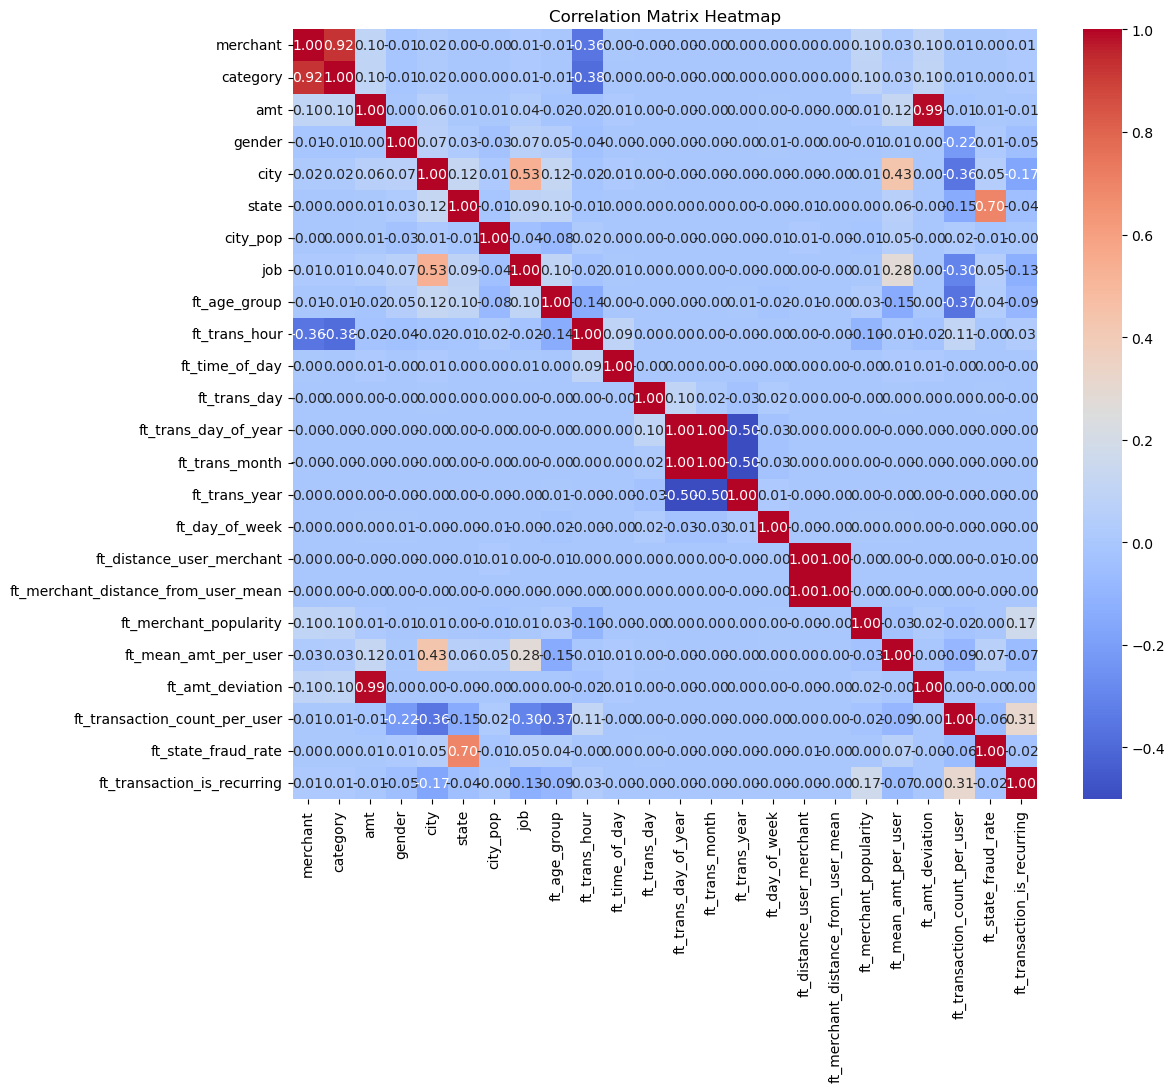

Highly Correlated Feature Pairs:
                               Feature_1                            Feature_2  \
1                               merchant                             category   
24                              category                             merchant   
68                                   amt                     ft_amt_deviation   
301                 ft_trans_day_of_year                       ft_trans_month   
324                       ft_trans_month                 ft_trans_day_of_year   
401            ft_distance_user_merchant  ft_merchant_distance_from_user_mean   
424  ft_merchant_distance_from_user_mean            ft_distance_user_merchant   
482                     ft_amt_deviation                                  amt   

     Correlation  
1       0.924054  
24      0.924054  
68      0.992205  
301     0.996813  
324     0.996813  
401     0.996967  
424     0.996967  
482     0.992205  


In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the encoded training data
correlation_matrix = X_train_encoded.corr()

# Save the correlation matrix as a CSV file if needed
correlation_matrix.to_csv("correlation_matrix.csv", index=True)
print("Correlation matrix saved as 'correlation_matrix.csv'")

# # Display the correlation matrix
# print("Correlation Matrix:")
# print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Identify highly correlated features (optional)
threshold = 0.75  # Adjust threshold as needed
high_correlation_pairs = correlation_matrix.unstack().reset_index()
high_correlation_pairs.columns = ['Feature_1', 'Feature_2', 'Correlation']
high_correlation_pairs = high_correlation_pairs[
    (high_correlation_pairs['Correlation'] > threshold) & 
    (high_correlation_pairs['Feature_1'] != high_correlation_pairs['Feature_2'])
]

print("Highly Correlated Feature Pairs:")
print(high_correlation_pairs)

Feature Importance analysis

In [71]:
!pip install xgboost

In [72]:
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt

In [73]:
# Step 1: Convert data into DMatrix (XGBoost's optimized data structure)
dtrain = xgb.DMatrix(X_train_encoded, label=y_train)
dval = xgb.DMatrix(X_val_encoded, label=y_val)

# Step 2: Define XGBoost parameters
params = {
    'objective': 'binary:logistic',  # For binary classification
    'eval_metric': 'auc',           # Metric to evaluate during training
    'max_depth': 6,                 # Tree depth
    'eta': 0.1,                     # Learning rate
    'subsample': 0.8,               # Subsample ratio
    'colsample_bytree': 0.8,        # Feature sampling ratio
    'seed': 42                      # Seed for reproducibility
}

# Step 3: Train the XGBoost model
model = xgb.train(
    params, 
    dtrain, 
    num_boost_round=100, 
    evals=[(dval, 'validation')], 
    early_stopping_rounds=10,       # Stops if validation AUC doesn't improve
    verbose_eval=10
)

[0]	validation-auc:0.89842
[10]	validation-auc:0.98320
[20]	validation-auc:0.99074
[30]	validation-auc:0.99351
[40]	validation-auc:0.99534
[50]	validation-auc:0.99653
[60]	validation-auc:0.99669
[66]	validation-auc:0.99637


In [74]:
# Retrieve feature importance
feature_importance = model.get_score(importance_type='weight')  # Options: 'weight', 'gain', 'cover'

# Sort feature importance
sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Print feature importance
print("Feature Importance Ranking:")
for feature, score in sorted_importance:
    print(f"{feature}: {score}")

Feature Importance Ranking:
amt: 407.0
ft_merchant_popularity: 315.0
city: 309.0
category: 267.0
ft_trans_hour: 249.0
ft_amt_deviation: 193.0
ft_mean_amt_per_user: 137.0
merchant: 125.0
ft_age_group: 118.0
city_pop: 107.0
ft_transaction_count_per_user: 102.0
job: 71.0
ft_trans_day_of_year: 68.0
ft_trans_day: 43.0
gender: 40.0
ft_time_of_day: 35.0
ft_distance_user_merchant: 22.0
ft_state_fraud_rate: 19.0
state: 14.0
ft_day_of_week: 14.0
ft_merchant_distance_from_user_mean: 14.0
ft_trans_year: 3.0
ft_trans_month: 2.0
ft_transaction_is_recurring: 1.0


<Figure size 2000x1600 with 0 Axes>

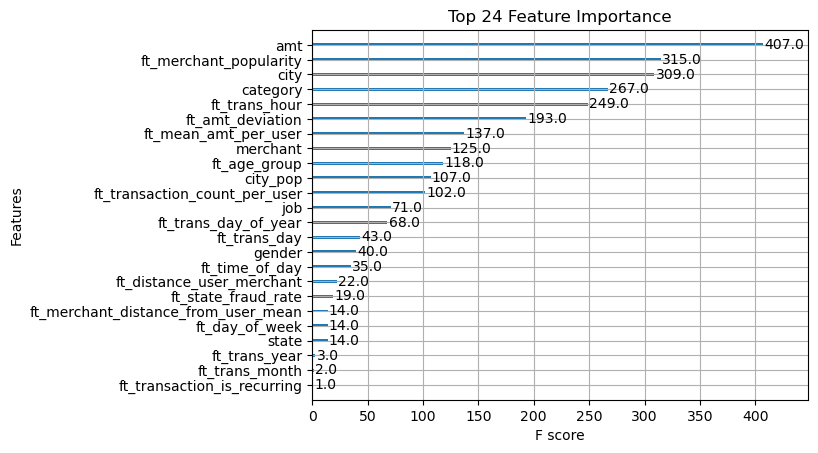

In [75]:
# Plot feature importance
plt.figure(figsize=(20, 16))
plot_importance(model, importance_type='weight', max_num_features=24)  # Top 10 features
plt.title("Top 24 Feature Importance")
plt.show()


Analysis based on Correlation and Feature Importance (this needs to be evaluated with business)
Retain the Most Important Features: • Retain amt, ft_merchant_popularity, category, city, and ft_trans_hour because they are critical based on their F-scores.
Based on business decision - Drop Highly Correlated Redundant Features: • Drop ft_amt_deviation because it is highly correlated with amt, which has a much higher importance score. • Drop ft_trans_day_of_year because it is highly correlated with ft_trans_month and has a lower importance score.
Drop Low Importance Features: • Drop features like ft_trans_year, ft_trans_month, and ft_transaction_is_recurring unless domain knowledge suggests they add unique value.
Evaluate Marginal Features: • Features like gender, state, and ft_merchant_distance_from_user_mean have low importance scores and no significant correlation with critical features. These can be evaluated by testing model performance with and without them.
Steps to move forward:
Define the metric to evaluate the model
Baseline model with all the features
Ex: Drop 7 least important features - model and compare result
Ex: Drop 6 more (total 13) least important features - model and compare result
Iterate more if necessary
Based on the best result, keep the features and move to hyper parameter tuning of the model
Define the Metric
Modeling to get ideal features
Baseline Model
Check and fix for Data Leakage
Iterate to get best number of Features
Modeling to get the best hyper-parameter tuned model

Running 3 models Logistic Regression, Random Forest and Keras

In [76]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy.sparse import hstack, csr_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import recall_score
import numpy as np

# No columns dropped (initial state)
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)
encoded_train = encoder.fit_transform(X_train[categorical_columns])
encoded_val = encoder.transform(X_val[categorical_columns])
encoded_test = encoder.transform(X_test[categorical_columns])

# Convert numerical data to sparse matrices
numerical_train = csr_matrix(X_train.drop(columns=categorical_columns).to_numpy())
numerical_val = csr_matrix(X_val.drop(columns=categorical_columns).to_numpy())
numerical_test = csr_matrix(X_test.drop(columns=categorical_columns).to_numpy())

# Combine numerical and encoded categorical data
X_train_encoded = hstack([numerical_train, encoded_train])
X_val_encoded = hstack([numerical_val, encoded_val])
X_test_encoded = hstack([numerical_test, encoded_test])

# Scale the data
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_train_pred = log_reg.predict(X_train_scaled)
y_val_pred = log_reg.predict(X_val_scaled)

training_recall = recall_score(y_train, y_train_pred)
validation_recall = recall_score(y_val, y_val_pred)

print("Logistic Regression")
print("Training Recall:", round(training_recall, 4))
print("Validation Recall:", round(validation_recall, 4))
print()

# Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
rf.fit(X_train_scaled, y_train)

y_train_pred_rf = rf.predict(X_train_scaled)
y_val_pred_rf = rf.predict(X_val_scaled)

training_recall_rf = recall_score(y_train, y_train_pred_rf)
validation_recall_rf = recall_score(y_val, y_val_pred_rf)

print("Random Forest")
print("Training Recall:", round(training_recall_rf, 4))
print("Validation Recall:", round(validation_recall_rf, 4))
print()

# Keras Neural Network
# Ensure y_train is numeric and 1D
y_train_numeric = y_train.to_numpy().astype(int)

# Calculate class weights using np.unique
unique_classes, class_counts = np.unique(y_train_numeric, return_counts=True)
class_weights_dict = {cls: len(y_train_numeric) / (2 * count) for cls, count in zip(unique_classes, class_counts)}

print("Class Weights:", class_weights_dict)

# Define and compile the Keras model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['Recall'])

# Train the model
model.fit(
    X_train_scaled, y_train_numeric,
    epochs=20,
    batch_size=256,
    validation_data=(X_val_scaled, y_val),
    class_weight=class_weights_dict,
    verbose=1
)

# Adjust threshold and calculate recall
threshold = 0.1
y_train_pred_keras = (model.predict(X_train_scaled) > threshold).astype(int)
y_val_pred_keras = (model.predict(X_val_scaled) > threshold).astype(int)

training_recall_keras = recall_score(y_train_numeric, y_train_pred_keras)
validation_recall_keras = recall_score(y_val, y_val_pred_keras)

print("Keras Neural Network")
print("Training Recall:", round(training_recall_keras, 4))
print("Validation Recall:", round(validation_recall_keras, 4))




c:\Users\reddo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Training Recall: 0.2893
Validation Recall: 0.262

Random Forest
Training Recall: 0.0071
Validation Recall: 0.0063

Class Weights: {0: 0.5029076930096733, 1: 86.47881522165555}


c:\Users\reddo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - Recall: 0.4780 - loss: 5.8515 - val_Recall: 0.6745 - val_loss: 0.5944
Epoch 2/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - Recall: 0.5964 - loss: 0.5265 - val_Recall: 0.7169 - val_loss: 0.4174
Epoch 3/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - Recall: 0.5909 - loss: 0.4806 - val_Recall: 0.7333 - val_loss: 0.3833
Epoch 4/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - Recall: 0.6238 - loss: 0.4613 - val_Recall: 0.7271 - val_loss: 0.3734
Epoch 5/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - Recall: 0.6374 - loss: 0.4540 - val_Recall: 0.8078 - val_loss: 0.4530
Epoch 6/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - Recall: 0.6514 - loss: 0.4453 - val_Recall: 0.7522 - val_loss: 0.3830
Epoch 7/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - Recall: 0.6410 - loss: 0.4484 - val_Recall: 0.7200 - val_loss: 0.3519
Epoch 8/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - Recall: 0.6523 - loss: 0.4414 - val_Recall: 0.7545 - v

dropping column 'ft_transaction_is_recurring'

In [77]:
# Ensure y_train and y_val are numpy arrays
y_train = np.array(y_train)
y_val = np.array(y_val)


In [78]:
# Drop the specified column
X_train_dropped = X_train.drop(columns=['ft_transaction_is_recurring'])
X_val_dropped = X_val.drop(columns=['ft_transaction_is_recurring'])
X_test_dropped = X_test.drop(columns=['ft_transaction_is_recurring'])

# Identify categorical columns
categorical_columns = X_train_dropped.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)  # Keep sparse matrix
encoded_train = encoder.fit_transform(X_train_dropped[categorical_columns])
encoded_val = encoder.transform(X_val_dropped[categorical_columns])
encoded_test = encoder.transform(X_test_dropped[categorical_columns])

# Convert numerical data to sparse matrices
numerical_train = X_train_dropped.drop(columns=categorical_columns).to_numpy()
numerical_val = X_val_dropped.drop(columns=categorical_columns).to_numpy()
numerical_test = X_test_dropped.drop(columns=categorical_columns).to_numpy()

# Combine numerical and encoded categorical data
X_train_encoded = hstack([numerical_train, encoded_train])
X_val_encoded = hstack([numerical_val, encoded_val])
X_test_encoded = hstack([numerical_test, encoded_test])

# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)  # with_mean=False for sparse matrices
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Ensure y_train and y_val are numpy arrays
import numpy as np
y_train = np.array(y_train)
y_val = np.array(y_val)

# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score

log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predictions for Logistic Regression
y_train_pred = log_reg.predict(X_train_scaled)
y_val_pred = log_reg.predict(X_val_scaled)

# Calculate Recall Scores for Logistic Regression
training_recall_lr = recall_score(y_train, y_train_pred)
validation_recall_lr = recall_score(y_val, y_val_pred)

print("Logistic Regression Training Recall:", training_recall_lr)
print("Logistic Regression Validation Recall:", validation_recall_lr)

# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions for Random Forest
y_train_pred_rf = rf_model.predict(X_train_scaled)
y_val_pred_rf = rf_model.predict(X_val_scaled)

# Calculate Recall Scores for Random Forest
training_recall_rf = recall_score(y_train, y_train_pred_rf)
validation_recall_rf = recall_score(y_val, y_val_pred_rf)

print("Random Forest Training Recall:", training_recall_rf)
print("Random Forest Validation Recall:", validation_recall_rf)

# Keras Model
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

class_weights_dict = {
    0: len(y_train) / (2 * np.bincount(y_train)[0]),
    1: len(y_train) / (2 * np.bincount(y_train)[1])
}

model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['Recall'])

model.fit(
    X_train_scaled, y_train,
    epochs=20,
    batch_size=256,
    validation_data=(X_val_scaled, y_val),
    class_weight=class_weights_dict,
    verbose=1
)

# Predictions for Keras Model with adjusted threshold
threshold = 0.1
y_train_pred_keras = (model.predict(X_train_scaled) > threshold).astype(int)
y_val_pred_keras = (model.predict(X_val_scaled) > threshold).astype(int)

# Calculate Recall Scores for Keras Model
training_recall_keras = recall_score(y_train, y_train_pred_keras)
validation_recall_keras = recall_score(y_val, y_val_pred_keras)

print("Keras Training Recall:", training_recall_keras)
print("Keras Validation Recall:", validation_recall_keras)




c:\Users\reddo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Training Recall: 0.265790506080816
Logistic Regression Validation Recall: 0.2407843137254902
Random Forest Training Recall: 1.0
Random Forest Validation Recall: 0.6462745098039215


c:\Users\reddo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - Recall: 0.7486 - loss: 3.8556 - val_Recall: 1.0000 - val_loss: 0.7121
Epoch 2/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.8692 - loss: 0.7022 - val_Recall: 1.0000 - val_loss: 0.7014
Epoch 3/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.7413 - loss: 0.6976 - val_Recall: 0.0000e+00 - val_loss: 0.6871
Epoch 4/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.2928 - loss: 0.7006 - val_Recall: 1.0000 - val_loss: 0.6934
Epoch 5/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.4308 - loss: 0.6932 - val_Recall: 1.0000 - val_loss: 0.6984
Epoch 6/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.8904 - loss: 0.7191 - val_Recall: 1.0000 - val_loss: 0.7026
Epoch 7/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - Recall: 0.8571 - loss: 0.7002 - val_Recall: 1.0000 - val_loss: 0.6937
Epoch 8/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.4550 - loss: 0.6945 - val_Recall: 1.0000

dropping column 'ft_trans_year'

In [79]:
# Drop the specified column
X_train_dropped = X_train.drop(columns=['ft_trans_year'])
X_val_dropped = X_val.drop(columns=['ft_trans_year'])
X_test_dropped = X_test.drop(columns=['ft_trans_year'])

# Identify categorical columns
categorical_columns = X_train_dropped.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack, csr_matrix

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)  # Keep sparse matrix
encoded_train = encoder.fit_transform(X_train_dropped[categorical_columns])
encoded_val = encoder.transform(X_val_dropped[categorical_columns])
encoded_test = encoder.transform(X_test_dropped[categorical_columns])

# Convert numerical data to sparse matrices
numerical_train = X_train_dropped.drop(columns=categorical_columns).to_numpy()
numerical_val = X_val_dropped.drop(columns=categorical_columns).to_numpy()
numerical_test = X_test_dropped.drop(columns=categorical_columns).to_numpy()

# Combine numerical and encoded categorical data
X_train_encoded = hstack([numerical_train, encoded_train])
X_val_encoded = hstack([numerical_val, encoded_val])
X_test_encoded = hstack([numerical_test, encoded_test])

# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)  # with_mean=False for sparse matrices
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Ensure y_train and y_val are numpy arrays
y_train = np.array(y_train)
y_val = np.array(y_val)

# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score

log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_train_pred = log_reg.predict(X_train_scaled)
y_val_pred = log_reg.predict(X_val_scaled)

log_train_recall = recall_score(y_train, y_train_pred)
log_val_recall = recall_score(y_val, y_val_pred)

print(f"Logistic Regression - Training Recall: {log_train_recall:.4f}")
print(f"Logistic Regression - Validation Recall: {log_val_recall:.4f}")

# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_train_pred_rf = rf_model.predict(X_train_scaled)
y_val_pred_rf = rf_model.predict(X_val_scaled)

rf_train_recall = recall_score(y_train, y_train_pred_rf)
rf_val_recall = recall_score(y_val, y_val_pred_rf)

print(f"Random Forest - Training Recall: {rf_train_recall:.4f}")
print(f"Random Forest - Validation Recall: {rf_val_recall:.4f}")

# Keras Model
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

class_weights_dict = {
    0: len(y_train) / (2 * np.bincount(y_train)[0]),
    1: len(y_train) / (2 * np.bincount(y_train)[1])
}

model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['Recall'])

model.fit(
    X_train_scaled, y_train,
    epochs=20,
    batch_size=256,
    validation_data=(X_val_scaled, y_val),
    class_weight=class_weights_dict,
    verbose=1
)

# Predictions for Keras Model with adjusted threshold
threshold = 0.1
y_train_pred_keras = (model.predict(X_train_scaled) > threshold).astype(int)
y_val_pred_keras = (model.predict(X_val_scaled) > threshold).astype(int)

keras_train_recall = recall_score(y_train, y_train_pred_keras)
keras_val_recall = recall_score(y_val, y_val_pred_keras)

print(f"Keras - Training Recall: {keras_train_recall:.4f}")
print(f"Keras - Validation Recall: {keras_val_recall:.4f}")


Logistic Regression - Training Recall: 0.2762
Logistic Regression - Validation Recall: 0.2612
Random Forest - Training Recall: 1.0000
Random Forest - Validation Recall: 0.6463


c:\Users\reddo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - Recall: 0.6234 - loss: 0.5430 - val_Recall: 0.7718 - val_loss: 0.3231
Epoch 2/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.8481 - loss: 0.2889 - val_Recall: 0.8047 - val_loss: 0.2221
Epoch 3/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.9081 - loss: 0.2115 - val_Recall: 0.8008 - val_loss: 0.1824
Epoch 4/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.9297 - loss: 0.1736 - val_Recall: 0.8024 - val_loss: 0.1506
Epoch 5/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.9444 - loss: 0.1534 - val_Recall: 0.8243 - val_loss: 0.2288
Epoch 6/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.9462 - loss: 0.1460 - val_Recall: 0.8000 - val_loss: 0.1760
Epoch 7/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.9505 - loss: 0.1290 - val_Recall: 0.8055 - val_loss: 0.1939
Epoch 8/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - Recall: 0.9450 - loss: 0.1324 - val_Recall: 0.8141 - v

dropping column 'ft_trans_month'

In [80]:
# Drop the specified column
X_train_dropped = X_train.drop(columns=['ft_trans_month'])
X_val_dropped = X_val.drop(columns=['ft_trans_month'])
X_test_dropped = X_test.drop(columns=['ft_trans_month'])

# Identify categorical columns
categorical_columns = X_train_dropped.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack, csr_matrix

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)  # Keep sparse matrix
encoded_train = encoder.fit_transform(X_train_dropped[categorical_columns])
encoded_val = encoder.transform(X_val_dropped[categorical_columns])
encoded_test = encoder.transform(X_test_dropped[categorical_columns])

# Convert numerical data to sparse matrices
numerical_train = X_train_dropped.drop(columns=categorical_columns).to_numpy()
numerical_val = X_val_dropped.drop(columns=categorical_columns).to_numpy()
numerical_test = X_test_dropped.drop(columns=categorical_columns).to_numpy()

# Combine numerical and encoded categorical data
X_train_encoded = hstack([numerical_train, encoded_train])
X_val_encoded = hstack([numerical_val, encoded_val])
X_test_encoded = hstack([numerical_test, encoded_test])

# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)  # with_mean=False for sparse matrices
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Ensure y_train and y_val are numpy arrays
y_train = np.array(y_train)
y_val = np.array(y_val)

# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score

log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_train_pred = log_reg.predict(X_train_scaled)
y_val_pred = log_reg.predict(X_val_scaled)

log_train_recall = recall_score(y_train, y_train_pred)
log_val_recall = recall_score(y_val, y_val_pred)

print(f"Logistic Regression - Training Recall: {log_train_recall:.4f}")
print(f"Logistic Regression - Validation Recall: {log_val_recall:.4f}")

# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_train_pred_rf = rf_model.predict(X_train_scaled)
y_val_pred_rf = rf_model.predict(X_val_scaled)

rf_train_recall = recall_score(y_train, y_train_pred_rf)
rf_val_recall = recall_score(y_val, y_val_pred_rf)

print(f"Random Forest - Training Recall: {rf_train_recall:.4f}")
print(f"Random Forest - Validation Recall: {rf_val_recall:.4f}")

# Keras Model
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

class_weights_dict = {
    0: len(y_train) / (2 * np.bincount(y_train)[0]),
    1: len(y_train) / (2 * np.bincount(y_train)[1])
}

model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['Recall'])

model.fit(
    X_train_scaled, y_train,
    epochs=20,
    batch_size=256,
    validation_data=(X_val_scaled, y_val),
    class_weight=class_weights_dict,
    verbose=1
)

# Predictions for Keras Model with adjusted threshold
threshold = 0.1
y_train_pred_keras = (model.predict(X_train_scaled) > threshold).astype(int)
y_val_pred_keras = (model.predict(X_val_scaled) > threshold).astype(int)

keras_train_recall = recall_score(y_train, y_train_pred_keras)
keras_val_recall = recall_score(y_val, y_val_pred_keras)

print(f"Keras - Training Recall: {keras_train_recall:.4f}")
print(f"Keras - Validation Recall: {keras_val_recall:.4f}")



c:\Users\reddo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Training Recall: 0.2866
Logistic Regression - Validation Recall: 0.2667
Random Forest - Training Recall: 1.0000
Random Forest - Validation Recall: 0.6392


c:\Users\reddo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - Recall: 0.6661 - loss: 3.0004 - val_Recall: 1.0000 - val_loss: 0.7047
Epoch 2/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.8398 - loss: 0.7030 - val_Recall: 1.0000 - val_loss: 0.6953
Epoch 3/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.6261 - loss: 0.7011 - val_Recall: 1.0000 - val_loss: 0.6973
Epoch 4/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.8623 - loss: 0.7029 - val_Recall: 0.0000e+00 - val_loss: 0.6841
Epoch 5/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.2570 - loss: 0.6975 - val_Recall: 1.0000 - val_loss: 0.6999
Epoch 6/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.8236 - loss: 0.6984 - val_Recall: 0.0000e+00 - val_loss: 0.6910
Epoch 7/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.1260 - loss: 0.6868 - val_Recall: 1.0000 - val_loss: 0.7114
Epoch 8/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.9196 - loss: 0.7026 - val_Recall: 1.

dropping column 'ft_state_fraud_rate' 

In [81]:
# Drop the specified column
X_train_dropped = X_train.drop(columns=['ft_state_fraud_rate'])
X_val_dropped = X_val.drop(columns=['ft_state_fraud_rate'])
X_test_dropped = X_test.drop(columns=['ft_state_fraud_rate'])

# Identify categorical columns
categorical_columns = X_train_dropped.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack, csr_matrix

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)  # Keep sparse matrix
encoded_train = encoder.fit_transform(X_train_dropped[categorical_columns])
encoded_val = encoder.transform(X_val_dropped[categorical_columns])
encoded_test = encoder.transform(X_test_dropped[categorical_columns])

# Convert numerical data to sparse matrices
numerical_train = X_train_dropped.drop(columns=categorical_columns).to_numpy()
numerical_val = X_val_dropped.drop(columns=categorical_columns).to_numpy()
numerical_test = X_test_dropped.drop(columns=categorical_columns).to_numpy()

# Combine numerical and encoded categorical data
X_train_encoded = hstack([numerical_train, encoded_train])
X_val_encoded = hstack([numerical_val, encoded_val])
X_test_encoded = hstack([numerical_test, encoded_test])

# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)  # with_mean=False for sparse matrices
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Ensure y_train and y_val are numpy arrays
y_train = np.array(y_train)
y_val = np.array(y_val)

# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score

log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_train_pred = log_reg.predict(X_train_scaled)
y_val_pred = log_reg.predict(X_val_scaled)

log_train_recall = recall_score(y_train, y_train_pred)
log_val_recall = recall_score(y_val, y_val_pred)

print(f"Logistic Regression - Training Recall: {log_train_recall:.4f}")
print(f"Logistic Regression - Validation Recall: {log_val_recall:.4f}")

# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_train_pred_rf = rf_model.predict(X_train_scaled)
y_val_pred_rf = rf_model.predict(X_val_scaled)

rf_train_recall = recall_score(y_train, y_train_pred_rf)
rf_val_recall = recall_score(y_val, y_val_pred_rf)

print(f"Random Forest - Training Recall: {rf_train_recall:.4f}")
print(f"Random Forest - Validation Recall: {rf_val_recall:.4f}")

# Keras Model
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

class_weights_dict = {
    0: len(y_train) / (2 * np.bincount(y_train)[0]),
    1: len(y_train) / (2 * np.bincount(y_train)[1])
}

model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['Recall'])

model.fit(
    X_train_scaled, y_train,
    epochs=20,
    batch_size=256,
    validation_data=(X_val_scaled, y_val),
    class_weight=class_weights_dict,
    verbose=1
)

# Predictions for Keras Model with adjusted threshold
threshold = 0.1
y_train_pred_keras = (model.predict(X_train_scaled) > threshold).astype(int)
y_val_pred_keras = (model.predict(X_val_scaled) > threshold).astype(int)

keras_train_recall = recall_score(y_train, y_train_pred_keras)
keras_val_recall = recall_score(y_val, y_val_pred_keras)

print(f"Keras - Training Recall: {keras_train_recall:.4f}")
print(f"Keras - Validation Recall: {keras_val_recall:.4f}")


c:\Users\reddo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Training Recall: 0.2670
Logistic Regression - Validation Recall: 0.2447
Random Forest - Training Recall: 1.0000
Random Forest - Validation Recall: 0.6376


c:\Users\reddo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - Recall: 0.5856 - loss: 4.1697 - val_Recall: 0.4400 - val_loss: 0.6016
Epoch 2/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.6379 - loss: 0.5943 - val_Recall: 0.7106 - val_loss: 0.4318
Epoch 3/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.6909 - loss: 0.4482 - val_Recall: 0.7435 - val_loss: 0.3378
Epoch 4/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.7575 - loss: 0.3975 - val_Recall: 0.7373 - val_loss: 0.2712
Epoch 5/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.7805 - loss: 0.3817 - val_Recall: 0.8400 - val_loss: 0.5056
Epoch 6/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.7965 - loss: 0.3731 - val_Recall: 0.7788 - val_loss: 0.2948
Epoch 7/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.7992 - loss: 0.3773 - val_Recall: 0.8173 - val_loss: 0.3409
Epoch 8/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.7979 - loss: 0.3663 - val_Recall: 0.7451 - v

dropping column 'state'

In [82]:
# Drop the specified column
X_train_dropped = X_train.drop(columns=['state'])
X_val_dropped = X_val.drop(columns=['state'])
X_test_dropped = X_test.drop(columns=['state'])

# Identify categorical columns
categorical_columns = X_train_dropped.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)  # Keep sparse matrix
encoded_train = encoder.fit_transform(X_train_dropped[categorical_columns])
encoded_val = encoder.transform(X_val_dropped[categorical_columns])
encoded_test = encoder.transform(X_test_dropped[categorical_columns])

# Convert numerical data to sparse matrices
numerical_train = X_train_dropped.drop(columns=categorical_columns).to_numpy()
numerical_val = X_val_dropped.drop(columns=categorical_columns).to_numpy()
numerical_test = X_test_dropped.drop(columns=categorical_columns).to_numpy()

# Combine numerical and encoded categorical data
X_train_encoded = hstack([numerical_train, encoded_train])
X_val_encoded = hstack([numerical_val, encoded_val])
X_test_encoded = hstack([numerical_test, encoded_test])

# Scale the data
scaler = StandardScaler(with_mean=False)  # with_mean=False for sparse matrices
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Ensure y_train and y_val are numpy arrays
y_train = np.array(y_train)
y_val = np.array(y_val)

# Logistic Regression Model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_train_pred = log_reg.predict(X_train_scaled)
y_val_pred = log_reg.predict(X_val_scaled)

log_train_recall = recall_score(y_train, y_train_pred)
log_val_recall = recall_score(y_val, y_val_pred)

print(f"Logistic Regression - Training Recall: {log_train_recall:.4f}")
print(f"Logistic Regression - Validation Recall: {log_val_recall:.4f}")

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_train_pred_rf = rf_model.predict(X_train_scaled)
y_val_pred_rf = rf_model.predict(X_val_scaled)

rf_train_recall = recall_score(y_train, y_train_pred_rf)
rf_val_recall = recall_score(y_val, y_val_pred_rf)

print(f"Random Forest - Training Recall: {rf_train_recall:.4f}")
print(f"Random Forest - Validation Recall: {rf_val_recall:.4f}")

# Keras Model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['Recall'])

model.fit(
    X_train_scaled, y_train,
    epochs=20,
    batch_size=256,
    validation_data=(X_val_scaled, y_val),
    class_weight=class_weights_dict,
    verbose=1
)

threshold = 0.1
y_train_pred_keras = (model.predict(X_train_scaled) > threshold).astype(int)
y_val_pred_keras = (model.predict(X_val_scaled) > threshold).astype(int)

keras_train_recall = recall_score(y_train, y_train_pred_keras)
keras_val_recall = recall_score(y_val, y_val_pred_keras)

print(f"Keras - Training Recall: {keras_train_recall:.4f}")
print(f"Keras - Validation Recall: {keras_val_recall:.4f}")


c:\Users\reddo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Training Recall: 0.2628
Logistic Regression - Validation Recall: 0.2439
Random Forest - Training Recall: 1.0000
Random Forest - Validation Recall: 0.6400


c:\Users\reddo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - Recall: 0.4952 - loss: 5.3556 - val_Recall: 0.0392 - val_loss: 0.6780
Epoch 2/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.2683 - loss: 0.7017 - val_Recall: 0.0251 - val_loss: 0.6718
Epoch 3/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - Recall: 0.1517 - loss: 0.7135 - val_Recall: 0.0361 - val_loss: 0.6761
Epoch 4/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.1392 - loss: 0.7009 - val_Recall: 0.5271 - val_loss: 0.6022
Epoch 5/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.5387 - loss: 0.6337 - val_Recall: 0.6157 - val_loss: 0.4426
Epoch 6/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.6624 - loss: 0.4823 - val_Recall: 0.7467 - val_loss: 0.4451
Epoch 7/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.7496 - loss: 0.3988 - val_Recall: 0.7569 - val_loss: 0.3498
Epoch 8/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - Recall: 0.7783 - loss: 0.3855 - val_Recall: 0.7953 - v

dropping column 'ft_merchant_distance_from_user_mean'

In [83]:
# Drop the specified column
X_train_dropped = X_train.drop(columns=['ft_merchant_distance_from_user_mean'])
X_val_dropped = X_val.drop(columns=['ft_merchant_distance_from_user_mean'])
X_test_dropped = X_test.drop(columns=['ft_merchant_distance_from_user_mean'])

# Identify categorical columns
categorical_columns = X_train_dropped.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)  # Keep sparse matrix
encoded_train = encoder.fit_transform(X_train_dropped[categorical_columns])
encoded_val = encoder.transform(X_val_dropped[categorical_columns])
encoded_test = encoder.transform(X_test_dropped[categorical_columns])

# Convert numerical data to sparse matrices
numerical_train = X_train_dropped.drop(columns=categorical_columns).to_numpy()
numerical_val = X_val_dropped.drop(columns=categorical_columns).to_numpy()
numerical_test = X_test_dropped.drop(columns=categorical_columns).to_numpy()

# Combine numerical and encoded categorical data
X_train_encoded = hstack([numerical_train, encoded_train])
X_val_encoded = hstack([numerical_val, encoded_val])
X_test_encoded = hstack([numerical_test, encoded_test])

# Scale the data
scaler = StandardScaler(with_mean=False)  # with_mean=False for sparse matrices
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Ensure y_train and y_val are numpy arrays
y_train = np.array(y_train)
y_val = np.array(y_val)

# Logistic Regression Model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_train_pred = log_reg.predict(X_train_scaled)
y_val_pred = log_reg.predict(X_val_scaled)

log_train_recall = recall_score(y_train, y_train_pred)
log_val_recall = recall_score(y_val, y_val_pred)

print(f"Logistic Regression - Training Recall: {log_train_recall:.4f}")
print(f"Logistic Regression - Validation Recall: {log_val_recall:.4f}")

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_train_pred_rf = rf_model.predict(X_train_scaled)
y_val_pred_rf = rf_model.predict(X_val_scaled)

rf_train_recall = recall_score(y_train, y_train_pred_rf)
rf_val_recall = recall_score(y_val, y_val_pred_rf)

print(f"Random Forest - Training Recall: {rf_train_recall:.4f}")
print(f"Random Forest - Validation Recall: {rf_val_recall:.4f}")

# Keras Model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['Recall'])

model.fit(
    X_train_scaled, y_train,
    epochs=20,
    batch_size=256,
    validation_data=(X_val_scaled, y_val),
    class_weight=class_weights_dict,
    verbose=1
)

threshold = 0.1
y_train_pred_keras = (model.predict(X_train_scaled) > threshold).astype(int)
y_val_pred_keras = (model.predict(X_val_scaled) > threshold).astype(int)

keras_train_recall = recall_score(y_train, y_train_pred_keras)
keras_val_recall = recall_score(y_val, y_val_pred_keras)

print(f"Keras - Training Recall: {keras_train_recall:.4f}")
print(f"Keras - Validation Recall: {keras_val_recall:.4f}")



c:\Users\reddo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Training Recall: 0.2827
Logistic Regression - Validation Recall: 0.2580
Random Forest - Training Recall: 1.0000
Random Forest - Validation Recall: 0.6471


c:\Users\reddo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - Recall: 0.6010 - loss: 4.8703 - val_Recall: 0.0125 - val_loss: 0.6909
Epoch 2/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.2126 - loss: 0.6879 - val_Recall: 0.5647 - val_loss: 0.4113
Epoch 3/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - Recall: 0.5433 - loss: 0.5496 - val_Recall: 0.6267 - val_loss: 0.3961
Epoch 4/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.6088 - loss: 0.4365 - val_Recall: 0.7255 - val_loss: 0.3369
Epoch 5/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.6273 - loss: 0.4008 - val_Recall: 0.7569 - val_loss: 0.3331
Epoch 6/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.6961 - loss: 0.3584 - val_Recall: 0.7294 - val_loss: 0.2620
Epoch 7/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.7502 - loss: 0.3439 - val_Recall: 0.7231 - val_loss: 0.2230
Epoch 8/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.7473 - loss: 0.3345 - val_Recall: 0.8055 - v

dropping column 'ft_day_of_week'

In [84]:
# Drop the specified column
X_train_dropped = X_train.drop(columns=['ft_day_of_week'])
X_val_dropped = X_val.drop(columns=['ft_day_of_week'])
X_test_dropped = X_test.drop(columns=['ft_day_of_week'])

# Identify categorical columns
categorical_columns = X_train_dropped.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)  # Keep sparse matrix
encoded_train = encoder.fit_transform(X_train_dropped[categorical_columns])
encoded_val = encoder.transform(X_val_dropped[categorical_columns])
encoded_test = encoder.transform(X_test_dropped[categorical_columns])

# Convert numerical data to sparse matrices
numerical_train = X_train_dropped.drop(columns=categorical_columns).to_numpy()
numerical_val = X_val_dropped.drop(columns=categorical_columns).to_numpy()
numerical_test = X_test_dropped.drop(columns=categorical_columns).to_numpy()

# Combine numerical and encoded categorical data
X_train_encoded = hstack([numerical_train, encoded_train])
X_val_encoded = hstack([numerical_val, encoded_val])
X_test_encoded = hstack([numerical_test, encoded_test])

# Scale the data
scaler = StandardScaler(with_mean=False)  # with_mean=False for sparse matrices
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Ensure y_train and y_val are numpy arrays
y_train = np.array(y_train)
y_val = np.array(y_val)

# Logistic Regression Model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_train_pred = log_reg.predict(X_train_scaled)
y_val_pred = log_reg.predict(X_val_scaled)

log_train_recall = recall_score(y_train, y_train_pred)
log_val_recall = recall_score(y_val, y_val_pred)

print(f"Logistic Regression - Training Recall: {log_train_recall:.4f}")
print(f"Logistic Regression - Validation Recall: {log_val_recall:.4f}")

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_train_pred_rf = rf_model.predict(X_train_scaled)
y_val_pred_rf = rf_model.predict(X_val_scaled)

rf_train_recall = recall_score(y_train, y_train_pred_rf)
rf_val_recall = recall_score(y_val, y_val_pred_rf)

print(f"Random Forest - Training Recall: {rf_train_recall:.4f}")
print(f"Random Forest - Validation Recall: {rf_val_recall:.4f}")

# Keras Model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['Recall'])

model.fit(
    X_train_scaled, y_train,
    epochs=20,
    batch_size=256,
    validation_data=(X_val_scaled, y_val),
    class_weight=class_weights_dict,
    verbose=1
)

threshold = 0.1
y_train_pred_keras = (model.predict(X_train_scaled) > threshold).astype(int)
y_val_pred_keras = (model.predict(X_val_scaled) > threshold).astype(int)

keras_train_recall = recall_score(y_train, y_train_pred_keras)
keras_val_recall = recall_score(y_val, y_val_pred_keras)

print(f"Keras - Training Recall: {keras_train_recall:.4f}")
print(f"Keras - Validation Recall: {keras_val_recall:.4f}")



c:\Users\reddo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Training Recall: 0.2807
Logistic Regression - Validation Recall: 0.2565
Random Forest - Training Recall: 1.0000
Random Forest - Validation Recall: 0.6651


c:\Users\reddo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - Recall: 0.4650 - loss: 2.9520 - val_Recall: 0.5396 - val_loss: 0.6380
Epoch 2/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.6236 - loss: 0.5767 - val_Recall: 0.3984 - val_loss: 0.2689
Epoch 3/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.7171 - loss: 0.4086 - val_Recall: 0.7490 - val_loss: 0.2942
Epoch 4/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.8409 - loss: 0.3587 - val_Recall: 0.8745 - val_loss: 0.3431
Epoch 5/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.8630 - loss: 0.3445 - val_Recall: 0.8337 - val_loss: 0.2565
Epoch 6/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.8805 - loss: 0.3335 - val_Recall: 0.9020 - val_loss: 0.3899
Epoch 7/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.8900 - loss: 0.3019 - val_Recall: 0.8204 - val_loss: 0.2326
Epoch 8/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.9018 - loss: 0.2922 - val_Recall: 0.7937 - v

dropping column 'ft_time_of_day'

In [85]:
# Drop the specified column
X_train_dropped = X_train.drop(columns=['ft_time_of_day'])
X_val_dropped = X_val.drop(columns=['ft_time_of_day'])
X_test_dropped = X_test.drop(columns=['ft_time_of_day'])

# Identify categorical columns
categorical_columns = X_train_dropped.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)  # Keep sparse matrix
encoded_train = encoder.fit_transform(X_train_dropped[categorical_columns])
encoded_val = encoder.transform(X_val_dropped[categorical_columns])
encoded_test = encoder.transform(X_test_dropped[categorical_columns])

# Convert numerical data to sparse matrices
numerical_train = X_train_dropped.drop(columns=categorical_columns).to_numpy()
numerical_val = X_val_dropped.drop(columns=categorical_columns).to_numpy()
numerical_test = X_test_dropped.drop(columns=categorical_columns).to_numpy()

# Combine numerical and encoded categorical data
X_train_encoded = hstack([numerical_train, encoded_train])
X_val_encoded = hstack([numerical_val, encoded_val])
X_test_encoded = hstack([numerical_test, encoded_test])

# Scale the data
scaler = StandardScaler(with_mean=False)  # with_mean=False for sparse matrices
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Ensure y_train and y_val are numpy arrays
y_train = np.array(y_train)
y_val = np.array(y_val)

# Logistic Regression Model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_train_pred = log_reg.predict(X_train_scaled)
y_val_pred = log_reg.predict(X_val_scaled)

log_train_recall = recall_score(y_train, y_train_pred)
log_val_recall = recall_score(y_val, y_val_pred)

print(f"Logistic Regression - Training Recall: {log_train_recall:.4f}")
print(f"Logistic Regression - Validation Recall: {log_val_recall:.4f}")

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_train_pred_rf = rf_model.predict(X_train_scaled)
y_val_pred_rf = rf_model.predict(X_val_scaled)

rf_train_recall = recall_score(y_train, y_train_pred_rf)
rf_val_recall = recall_score(y_val, y_val_pred_rf)

print(f"Random Forest - Training Recall: {rf_train_recall:.4f}")
print(f"Random Forest - Validation Recall: {rf_val_recall:.4f}")

# Keras Model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['Recall'])

model.fit(
    X_train_scaled, y_train,
    epochs=20,
    batch_size=256,
    validation_data=(X_val_scaled, y_val),
    class_weight=class_weights_dict,
    verbose=1
)

threshold = 0.1
y_train_pred_keras = (model.predict(X_train_scaled) > threshold).astype(int)
y_val_pred_keras = (model.predict(X_val_scaled) > threshold).astype(int)

keras_train_recall = recall_score(y_train, y_train_pred_keras)
keras_val_recall = recall_score(y_val, y_val_pred_keras)

print(f"Keras - Training Recall: {keras_train_recall:.4f}")
print(f"Keras - Validation Recall: {keras_val_recall:.4f}")


c:\Users\reddo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Training Recall: 0.2056
Logistic Regression - Validation Recall: 0.1718
Random Forest - Training Recall: 1.0000
Random Forest - Validation Recall: 0.6071


c:\Users\reddo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - Recall: 0.4794 - loss: 4.9325 - val_Recall: 0.0667 - val_loss: 0.6447
Epoch 2/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.1937 - loss: 0.6719 - val_Recall: 0.6047 - val_loss: 0.4944
Epoch 3/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.5741 - loss: 0.5192 - val_Recall: 0.7051 - val_loss: 0.3770
Epoch 4/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.6421 - loss: 0.4576 - val_Recall: 0.8933 - val_loss: 0.9598
Epoch 5/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.6978 - loss: 0.4389 - val_Recall: 0.6675 - val_loss: 0.2819
Epoch 6/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.7272 - loss: 0.4094 - val_Recall: 0.7286 - val_loss: 0.3410
Epoch 7/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.7425 - loss: 0.3981 - val_Recall: 0.7569 - val_loss: 0.3231
Epoch 8/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.7634 - loss: 0.3823 - val_Recall: 0.7506 - v

dropping column 'ft_distance_user_merchant'

In [86]:
# Drop the specified column
X_train_dropped = X_train.drop(columns=['ft_distance_user_merchant'])
X_val_dropped = X_val.drop(columns=['ft_distance_user_merchant'])
X_test_dropped = X_test.drop(columns=['ft_distance_user_merchant'])

# Identify categorical columns
categorical_columns = X_train_dropped.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)  # Keep sparse matrix
encoded_train = encoder.fit_transform(X_train_dropped[categorical_columns])
encoded_val = encoder.transform(X_val_dropped[categorical_columns])
encoded_test = encoder.transform(X_test_dropped[categorical_columns])

# Convert numerical data to sparse matrices
numerical_train = X_train_dropped.drop(columns=categorical_columns).to_numpy()
numerical_val = X_val_dropped.drop(columns=categorical_columns).to_numpy()
numerical_test = X_test_dropped.drop(columns=categorical_columns).to_numpy()

# Combine numerical and encoded categorical data
X_train_encoded = hstack([numerical_train, encoded_train])
X_val_encoded = hstack([numerical_val, encoded_val])
X_test_encoded = hstack([numerical_test, encoded_test])

# Scale the data
scaler = StandardScaler(with_mean=False)  # with_mean=False for sparse matrices
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Ensure y_train and y_val are numpy arrays
y_train = np.array(y_train)
y_val = np.array(y_val)

# Logistic Regression Model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_train_pred = log_reg.predict(X_train_scaled)
y_val_pred = log_reg.predict(X_val_scaled)

log_train_recall = recall_score(y_train, y_train_pred)
log_val_recall = recall_score(y_val, y_val_pred)

print(f"Logistic Regression - Training Recall: {log_train_recall:.4f}")
print(f"Logistic Regression - Validation Recall: {log_val_recall:.4f}")

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_train_pred_rf = rf_model.predict(X_train_scaled)
y_val_pred_rf = rf_model.predict(X_val_scaled)

rf_train_recall = recall_score(y_train, y_train_pred_rf)
rf_val_recall = recall_score(y_val, y_val_pred_rf)

print(f"Random Forest - Training Recall: {rf_train_recall:.4f}")
print(f"Random Forest - Validation Recall: {rf_val_recall:.4f}")

# Keras Model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['Recall'])

model.fit(
    X_train_scaled, y_train,
    epochs=20,
    batch_size=256,
    validation_data=(X_val_scaled, y_val),
    class_weight=class_weights_dict,
    verbose=1
)

threshold = 0.1
y_train_pred_keras = (model.predict(X_train_scaled) > threshold).astype(int)
y_val_pred_keras = (model.predict(X_val_scaled) > threshold).astype(int)

keras_train_recall = recall_score(y_train, y_train_pred_keras)
keras_val_recall = recall_score(y_val, y_val_pred_keras)

print(f"Keras - Training Recall: {keras_train_recall:.4f}")
print(f"Keras - Validation Recall: {keras_val_recall:.4f}")



c:\Users\reddo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Training Recall: 0.2913
Logistic Regression - Validation Recall: 0.2635
Random Forest - Training Recall: 1.0000
Random Forest - Validation Recall: 0.6557


c:\Users\reddo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - Recall: 0.4765 - loss: 4.0585 - val_Recall: 0.1537 - val_loss: 0.6150
Epoch 2/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.5352 - loss: 0.5663 - val_Recall: 0.5098 - val_loss: 0.3961
Epoch 3/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.6207 - loss: 0.4747 - val_Recall: 0.5671 - val_loss: 0.3520
Epoch 4/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.6978 - loss: 0.4431 - val_Recall: 0.7906 - val_loss: 0.3822
Epoch 5/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.7233 - loss: 0.4182 - val_Recall: 0.7404 - val_loss: 0.3047
Epoch 6/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.7008 - loss: 0.4343 - val_Recall: 0.7741 - val_loss: 0.3352
Epoch 7/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.7814 - loss: 0.3654 - val_Recall: 0.7608 - val_loss: 0.2807
Epoch 8/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.7926 - loss: 0.3705 - val_Recall: 0.7459 - v

dropping column 'gender'

In [87]:
# Drop the specified column
X_train_dropped = X_train.drop(columns=['gender'])
X_val_dropped = X_val.drop(columns=['gender'])
X_test_dropped = X_test.drop(columns=['gender'])

# Identify categorical columns
categorical_columns = X_train_dropped.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)  # Keep sparse matrix
encoded_train = encoder.fit_transform(X_train_dropped[categorical_columns])
encoded_val = encoder.transform(X_val_dropped[categorical_columns])
encoded_test = encoder.transform(X_test_dropped[categorical_columns])

# Convert numerical data to sparse matrices
numerical_train = X_train_dropped.drop(columns=categorical_columns).to_numpy()
numerical_val = X_val_dropped.drop(columns=categorical_columns).to_numpy()
numerical_test = X_test_dropped.drop(columns=categorical_columns).to_numpy()

# Combine numerical and encoded categorical data
X_train_encoded = hstack([numerical_train, encoded_train])
X_val_encoded = hstack([numerical_val, encoded_val])
X_test_encoded = hstack([numerical_test, encoded_test])

# Scale the data
scaler = StandardScaler(with_mean=False)  # with_mean=False for sparse matrices
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Ensure y_train and y_val are numpy arrays
y_train = np.array(y_train)
y_val = np.array(y_val)

# Logistic Regression Model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_train_pred = log_reg.predict(X_train_scaled)
y_val_pred = log_reg.predict(X_val_scaled)

log_train_recall = recall_score(y_train, y_train_pred)
log_val_recall = recall_score(y_val, y_val_pred)

print(f"Logistic Regression - Training Recall: {log_train_recall:.4f}")
print(f"Logistic Regression - Validation Recall: {log_val_recall:.4f}")

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_train_pred_rf = rf_model.predict(X_train_scaled)
y_val_pred_rf = rf_model.predict(X_val_scaled)

rf_train_recall = recall_score(y_train, y_train_pred_rf)
rf_val_recall = recall_score(y_val, y_val_pred_rf)

print(f"Random Forest - Training Recall: {rf_train_recall:.4f}")
print(f"Random Forest - Validation Recall: {rf_val_recall:.4f}")

# Keras Model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['Recall'])

model.fit(
    X_train_scaled, y_train,
    epochs=20,
    batch_size=256,
    validation_data=(X_val_scaled, y_val),
    class_weight=class_weights_dict,
    verbose=1
)

threshold = 0.1
y_train_pred_keras = (model.predict(X_train_scaled) > threshold).astype(int)
y_val_pred_keras = (model.predict(X_val_scaled) > threshold).astype(int)

keras_train_recall = recall_score(y_train, y_train_pred_keras)
keras_val_recall = recall_score(y_val, y_val_pred_keras)

print(f"Keras - Training Recall: {keras_train_recall:.4f}")
print(f"Keras - Validation Recall: {keras_val_recall:.4f}")




c:\Users\reddo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Training Recall: 0.2764
Logistic Regression - Validation Recall: 0.2525
Random Forest - Training Recall: 1.0000
Random Forest - Validation Recall: 0.6557


c:\Users\reddo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - Recall: 0.4929 - loss: 6.5754 - val_Recall: 0.9051 - val_loss: 0.7134
Epoch 2/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.6261 - loss: 0.6028 - val_Recall: 0.7718 - val_loss: 0.5319
Epoch 3/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.6685 - loss: 0.4397 - val_Recall: 0.8180 - val_loss: 0.4634
Epoch 4/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.7454 - loss: 0.3589 - val_Recall: 0.7875 - val_loss: 0.3347
Epoch 5/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.7715 - loss: 0.3339 - val_Recall: 0.7741 - val_loss: 0.2479
Epoch 6/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.7820 - loss: 0.3165 - val_Recall: 0.7545 - val_loss: 0.2022
Epoch 7/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.7781 - loss: 0.3211 - val_Recall: 0.7937 - val_loss: 0.2765
Epoch 8/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.8022 - loss: 0.3068 - val_Recall: 0.7992 - v

dropping column 'ft_trans_day'

In [88]:
# Drop the specified column
X_train_dropped = X_train.drop(columns=['ft_trans_day'])
X_val_dropped = X_val.drop(columns=['ft_trans_day'])
X_test_dropped = X_test.drop(columns=['ft_trans_day'])

# Identify categorical columns
categorical_columns = X_train_dropped.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)  # Keep sparse matrix
encoded_train = encoder.fit_transform(X_train_dropped[categorical_columns])
encoded_val = encoder.transform(X_val_dropped[categorical_columns])
encoded_test = encoder.transform(X_test_dropped[categorical_columns])

# Convert numerical data to sparse matrices
numerical_train = X_train_dropped.drop(columns=categorical_columns).to_numpy()
numerical_val = X_val_dropped.drop(columns=categorical_columns).to_numpy()
numerical_test = X_test_dropped.drop(columns=categorical_columns).to_numpy()

# Combine numerical and encoded categorical data
X_train_encoded = hstack([numerical_train, encoded_train])
X_val_encoded = hstack([numerical_val, encoded_val])
X_test_encoded = hstack([numerical_test, encoded_test])

# Scale the data
scaler = StandardScaler(with_mean=False)  # with_mean=False for sparse matrices
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Ensure y_train and y_val are numpy arrays
y_train = np.array(y_train)
y_val = np.array(y_val)

# Logistic Regression Model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_train_pred = log_reg.predict(X_train_scaled)
y_val_pred = log_reg.predict(X_val_scaled)

log_train_recall = recall_score(y_train, y_train_pred)
log_val_recall = recall_score(y_val, y_val_pred)

print(f"Logistic Regression - Training Recall: {log_train_recall:.4f}")
print(f"Logistic Regression - Validation Recall: {log_val_recall:.4f}")

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_train_pred_rf = rf_model.predict(X_train_scaled)
y_val_pred_rf = rf_model.predict(X_val_scaled)

rf_train_recall = recall_score(y_train, y_train_pred_rf)
rf_val_recall = recall_score(y_val, y_val_pred_rf)

print(f"Random Forest - Training Recall: {rf_train_recall:.4f}")
print(f"Random Forest - Validation Recall: {rf_val_recall:.4f}")

# Keras Model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['Recall'])

model.fit(
    X_train_scaled, y_train,
    epochs=20,
    batch_size=256,
    validation_data=(X_val_scaled, y_val),
    class_weight=class_weights_dict,
    verbose=1
)

threshold = 0.1
y_train_pred_keras = (model.predict(X_train_scaled) > threshold).astype(int)
y_val_pred_keras = (model.predict(X_val_scaled) > threshold).astype(int)

keras_train_recall = recall_score(y_train, y_train_pred_keras)
keras_val_recall = recall_score(y_val, y_val_pred_keras)

print(f"Keras - Training Recall: {keras_train_recall:.4f}")
print(f"Keras - Validation Recall: {keras_val_recall:.4f}")



c:\Users\reddo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Training Recall: 0.2954
Logistic Regression - Validation Recall: 0.2753
Random Forest - Training Recall: 1.0000
Random Forest - Validation Recall: 0.6502


c:\Users\reddo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - Recall: 0.4269 - loss: 4.7678 - val_Recall: 0.0784 - val_loss: 0.6402
Epoch 2/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.4471 - loss: 0.5977 - val_Recall: 0.8729 - val_loss: 0.8509
Epoch 3/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.6058 - loss: 0.4875 - val_Recall: 0.7231 - val_loss: 0.3874
Epoch 4/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.6169 - loss: 0.4808 - val_Recall: 0.6369 - val_loss: 0.3497
Epoch 5/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.6317 - loss: 0.4527 - val_Recall: 0.7467 - val_loss: 0.3811
Epoch 6/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.6483 - loss: 0.4425 - val_Recall: 0.7294 - val_loss: 0.3464
Epoch 7/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.6361 - loss: 0.4540 - val_Recall: 0.7545 - val_loss: 0.3766
Epoch 8/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.6707 - loss: 0.4295 - val_Recall: 0.6714 - v

dropping column 'ft_trans_day_of_year'

In [89]:
# Drop the specified column
X_train_dropped = X_train.drop(columns=['ft_trans_day_of_year'])
X_val_dropped = X_val.drop(columns=['ft_trans_day_of_year'])
X_test_dropped = X_test.drop(columns=['ft_trans_day_of_year'])

# Identify categorical columns
categorical_columns = X_train_dropped.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)  # Keep sparse matrix
encoded_train = encoder.fit_transform(X_train_dropped[categorical_columns])
encoded_val = encoder.transform(X_val_dropped[categorical_columns])
encoded_test = encoder.transform(X_test_dropped[categorical_columns])

# Convert numerical data to sparse matrices
numerical_train = X_train_dropped.drop(columns=categorical_columns).to_numpy()
numerical_val = X_val_dropped.drop(columns=categorical_columns).to_numpy()
numerical_test = X_test_dropped.drop(columns=categorical_columns).to_numpy()

# Combine numerical and encoded categorical data
X_train_encoded = hstack([numerical_train, encoded_train])
X_val_encoded = hstack([numerical_val, encoded_val])
X_test_encoded = hstack([numerical_test, encoded_test])

# Scale the data
scaler = StandardScaler(with_mean=False)  # with_mean=False for sparse matrices
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Ensure y_train and y_val are numpy arrays
y_train = np.array(y_train)
y_val = np.array(y_val)

# Logistic Regression Model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_train_pred = log_reg.predict(X_train_scaled)
y_val_pred = log_reg.predict(X_val_scaled)

log_train_recall = recall_score(y_train, y_train_pred)
log_val_recall = recall_score(y_val, y_val_pred)

print(f"Logistic Regression - Training Recall: {log_train_recall:.4f}")
print(f"Logistic Regression - Validation Recall: {log_val_recall:.4f}")

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_train_pred_rf = rf_model.predict(X_train_scaled)
y_val_pred_rf = rf_model.predict(X_val_scaled)

rf_train_recall = recall_score(y_train, y_train_pred_rf)
rf_val_recall = recall_score(y_val, y_val_pred_rf)

print(f"Random Forest - Training Recall: {rf_train_recall:.4f}")
print(f"Random Forest - Validation Recall: {rf_val_recall:.4f}")

# Keras Model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['Recall'])

model.fit(
    X_train_scaled, y_train,
    epochs=20,
    batch_size=256,
    validation_data=(X_val_scaled, y_val),
    class_weight=class_weights_dict,
    verbose=1
)

threshold = 0.1
y_train_pred_keras = (model.predict(X_train_scaled) > threshold).astype(int)
y_val_pred_keras = (model.predict(X_val_scaled) > threshold).astype(int)

keras_train_recall = recall_score(y_train, y_train_pred_keras)
keras_val_recall = recall_score(y_val, y_val_pred_keras)

print(f"Keras - Training Recall: {keras_train_recall:.4f}")
print(f"Keras - Validation Recall: {keras_val_recall:.4f}")


c:\Users\reddo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Training Recall: 0.2821
Logistic Regression - Validation Recall: 0.2612
Random Forest - Training Recall: 1.0000
Random Forest - Validation Recall: 0.6573


c:\Users\reddo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - Recall: 0.6796 - loss: 3.0030 - val_Recall: 1.0000 - val_loss: 0.7036
Epoch 2/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.8540 - loss: 0.7071 - val_Recall: 0.0024 - val_loss: 0.6838
Epoch 3/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.2426 - loss: 0.7003 - val_Recall: 0.0024 - val_loss: 0.6915
Epoch 4/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.2423 - loss: 0.6908 - val_Recall: 0.0376 - val_loss: 0.6728
Epoch 5/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - Recall: 0.4098 - loss: 0.5946 - val_Recall: 0.6973 - val_loss: 0.4698
Epoch 6/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.5923 - loss: 0.4925 - val_Recall: 0.7318 - val_loss: 0.4156
Epoch 7/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.6076 - loss: 0.4681 - val_Recall: 0.6910 - val_loss: 0.3763
Epoch 8/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.6245 - loss: 0.4531 - val_Recall: 0.7851 - v

dropping column 'job'

In [90]:
# Drop the specified column
X_train_dropped = X_train.drop(columns=['job'])
X_val_dropped = X_val.drop(columns=['job'])
X_test_dropped = X_test.drop(columns=['job'])

# Identify categorical columns
categorical_columns = X_train_dropped.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)  # Keep sparse matrix
encoded_train = encoder.fit_transform(X_train_dropped[categorical_columns])
encoded_val = encoder.transform(X_val_dropped[categorical_columns])
encoded_test = encoder.transform(X_test_dropped[categorical_columns])

# Convert numerical data to sparse matrices
numerical_train = X_train_dropped.drop(columns=categorical_columns).to_numpy()
numerical_val = X_val_dropped.drop(columns=categorical_columns).to_numpy()
numerical_test = X_test_dropped.drop(columns=categorical_columns).to_numpy()

# Combine numerical and encoded categorical data
X_train_encoded = hstack([numerical_train, encoded_train])
X_val_encoded = hstack([numerical_val, encoded_val])
X_test_encoded = hstack([numerical_test, encoded_test])

# Scale the data
scaler = StandardScaler(with_mean=False)  # with_mean=False for sparse matrices
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Ensure y_train and y_val are numpy arrays
y_train = np.array(y_train)
y_val = np.array(y_val)

# Logistic Regression Model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_train_pred = log_reg.predict(X_train_scaled)
y_val_pred = log_reg.predict(X_val_scaled)

log_train_recall = recall_score(y_train, y_train_pred)
log_val_recall = recall_score(y_val, y_val_pred)

print(f"Logistic Regression - Training Recall: {log_train_recall:.4f}")
print(f"Logistic Regression - Validation Recall: {log_val_recall:.4f}")

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_train_pred_rf = rf_model.predict(X_train_scaled)
y_val_pred_rf = rf_model.predict(X_val_scaled)

rf_train_recall = recall_score(y_train, y_train_pred_rf)
rf_val_recall = recall_score(y_val, y_val_pred_rf)

print(f"Random Forest - Training Recall: {rf_train_recall:.4f}")
print(f"Random Forest - Validation Recall: {rf_val_recall:.4f}")

# Keras Model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['Recall'])

model.fit(
    X_train_scaled, y_train,
    epochs=20,
    batch_size=256,
    validation_data=(X_val_scaled, y_val),
    class_weight=class_weights_dict,
    verbose=1
)

threshold = 0.1
y_train_pred_keras = (model.predict(X_train_scaled) > threshold).astype(int)
y_val_pred_keras = (model.predict(X_val_scaled) > threshold).astype(int)

keras_train_recall = recall_score(y_train, y_train_pred_keras)
keras_val_recall = recall_score(y_val, y_val_pred_keras)

print(f"Keras - Training Recall: {keras_train_recall:.4f}")
print(f"Keras - Validation Recall: {keras_val_recall:.4f}")



c:\Users\reddo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Training Recall: 0.2917
Logistic Regression - Validation Recall: 0.2722
Random Forest - Training Recall: 1.0000
Random Forest - Validation Recall: 0.6337


c:\Users\reddo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.3130 - loss: 4.7422 - val_Recall: 0.9976 - val_loss: 0.7164
Epoch 2/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - Recall: 0.4249 - loss: 0.6277 - val_Recall: 0.6651 - val_loss: 0.4295
Epoch 3/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - Recall: 0.5741 - loss: 0.5026 - val_Recall: 0.7553 - val_loss: 0.4786
Epoch 4/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - Recall: 0.6089 - loss: 0.4761 - val_Recall: 0.6698 - val_loss: 0.3613
Epoch 5/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - Recall: 0.6252 - loss: 0.4597 - val_Recall: 0.7114 - val_loss: 0.3597
Epoch 6/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - Recall: 0.6269 - loss: 0.4547 - val_Recall: 0.7514 - val_loss: 0.3637
Epoch 7/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - Recall: 0.6395 - loss: 0.4452 - val_Recall: 0.7584 - val_loss: 0.4004
Epoch 8/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - Recall: 0.6354 - loss: 0.4524 - val_Recall: 0.7388 - v

dropping column 'ft_transaction_count_per_user'

In [91]:

# Drop the specified column
X_train_dropped = X_train.drop(columns=['ft_transaction_count_per_user'])
X_val_dropped = X_val.drop(columns=['ft_transaction_count_per_user'])
X_test_dropped = X_test.drop(columns=['ft_transaction_count_per_user'])

# Identify categorical columns
categorical_columns = X_train_dropped.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)  # Keep sparse matrix
encoded_train = encoder.fit_transform(X_train_dropped[categorical_columns])
encoded_val = encoder.transform(X_val_dropped[categorical_columns])
encoded_test = encoder.transform(X_test_dropped[categorical_columns])

# Convert numerical data to sparse matrices
numerical_train = X_train_dropped.drop(columns=categorical_columns).to_numpy()
numerical_val = X_val_dropped.drop(columns=categorical_columns).to_numpy()
numerical_test = X_test_dropped.drop(columns=categorical_columns).to_numpy()

# Combine numerical and encoded categorical data
X_train_encoded = hstack([numerical_train, encoded_train])
X_val_encoded = hstack([numerical_val, encoded_val])
X_test_encoded = hstack([numerical_test, encoded_test])

# Scale the data
scaler = StandardScaler(with_mean=False)  # with_mean=False for sparse matrices
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Ensure y_train and y_val are numpy arrays
y_train = np.array(y_train)
y_val = np.array(y_val)

# Logistic Regression Model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_train_pred = log_reg.predict(X_train_scaled)
y_val_pred = log_reg.predict(X_val_scaled)

log_train_recall = recall_score(y_train, y_train_pred)
log_val_recall = recall_score(y_val, y_val_pred)

print(f"Logistic Regression - Training Recall: {log_train_recall:.4f}")
print(f"Logistic Regression - Validation Recall: {log_val_recall:.4f}")

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_train_pred_rf = rf_model.predict(X_train_scaled)
y_val_pred_rf = rf_model.predict(X_val_scaled)

rf_train_recall = recall_score(y_train, y_train_pred_rf)
rf_val_recall = recall_score(y_val, y_val_pred_rf)

print(f"Random Forest - Training Recall: {rf_train_recall:.4f}")
print(f"Random Forest - Validation Recall: {rf_val_recall:.4f}")

# Keras Model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['Recall'])

model.fit(
    X_train_scaled, y_train,
    epochs=20,
    batch_size=256,
    validation_data=(X_val_scaled, y_val),
    class_weight=class_weights_dict,
    verbose=1
)

threshold = 0.1
y_train_pred_keras = (model.predict(X_train_scaled) > threshold).astype(int)
y_val_pred_keras = (model.predict(X_val_scaled) > threshold).astype(int)

keras_train_recall = recall_score(y_train, y_train_pred_keras)
keras_val_recall = recall_score(y_val, y_val_pred_keras)

print(f"Keras - Training Recall: {keras_train_recall:.4f}")
print(f"Keras - Validation Recall: {keras_val_recall:.4f}")



c:\Users\reddo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Training Recall: 0.2846
Logistic Regression - Validation Recall: 0.2573
Random Forest - Training Recall: 1.0000
Random Forest - Validation Recall: 0.6706


c:\Users\reddo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - Recall: 0.6564 - loss: 4.6257 - val_Recall: 0.1749 - val_loss: 0.6337
Epoch 2/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.5281 - loss: 0.6400 - val_Recall: 0.8165 - val_loss: 0.5512
Epoch 3/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.7257 - loss: 0.4449 - val_Recall: 0.6612 - val_loss: 0.2842
Epoch 4/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.7540 - loss: 0.4077 - val_Recall: 0.7537 - val_loss: 0.3169
Epoch 5/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.7727 - loss: 0.3859 - val_Recall: 0.7318 - val_loss: 0.2662
Epoch 6/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.7831 - loss: 0.3776 - val_Recall: 0.7961 - val_loss: 0.3994
Epoch 7/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.7883 - loss: 0.3700 - val_Recall: 0.7851 - val_loss: 0.3103
Epoch 8/20
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - Recall: 0.7993 - loss: 0.3510 - val_Recall: 0.7733 - v